# Sound data preprocessing

## Importing the required libraries
We'll start with importing required libraries

In [ ]:
import os
import random 
from pathlib import Path
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import cv2 as cv
from google.colab.patches import cv2_imshow
import tensorflow as tf
from sklearn.preprocessing import minmax_scale
import pickle


## Testing sound data from drive

Let's check the sample path to see what we have

In [ ]:
#Testing sample path
testing_sample = '/content/drive/MyDrive/Introduction to Deep Learning/4- Final_Project/UrbanSound8K/audio/fold10/2937-1-0-0.wav'

In [ ]:
#testing audio
ipd.Audio(testing_sample)

## Creating spectograms from the audio files
 Then let's create spectograms from the audio files. To do this, firstly we will create folders based on the categories of the sounds. After this we will define a function which creates spectograms from our audio files which I located these in my drive. Not to exceed colab's allocated free ram memory, we will use the function part by part based on audio folders' name

In [ ]:
#Defining path of audio files and spectogram files
all_fold_path = "/content/drive/MyDrive/Introduction to Deep Learning/4- Final_Project/UrbanSound8K/audio"
spectogram_filepath = "/content/drive/MyDrive/Introduction to Deep Learning/4- Final_Project/UrbanSound8K/spectograms"

In [ ]:
#creating folders based on categories of audio files
i = 0
while i<=9:
  spectogramfolder = f"{spectogram_filepath}/{i}"
  isExist = os.path.exists(spectogramfolder)
  if not isExist:
    os.makedirs(spectogramfolder)
  i+=1

In [ ]:
#defining a function to create spectograms from audio files
def create_spectogram(filepath):
  plt.rcParams["figure.figsize"] = [6.96, 5.2]
  plt.rcParams["figure.autolayout"] = True
  fig, ax = plt.subplots()
  y, sr = librosa.load(filepath) 
  S = librosa.feature.melspectrogram(y=y)
  S_dB = librosa.power_to_db(S, ref=np.max)
  img = librosa.display.specshow(S_dB, sr=sr,  hop_length=256)
  fig.tight_layout()
  saving_path = f"{spectogram_filepath}/{Path(filepath).stem.split('-')[1]}/{Path(filepath).stem}.png"
  plt.savefig(saving_path)
  plt.close('all') #if u want to see spectograms, comment this code

In [ ]:
#Testing function based on testing sample
create_spectogram(testing_sample)

In [ ]:
#Creating spectograms part by part based on folders' names to escape exceeding colab's allocated ram
spectogram_num = 0
list_of_folders = ["fold10","fold9","fold8","fold7"]
for folder in os.listdir(all_fold_path):
  isDir = os.path.isdir(f"{all_fold_path}/{folder}")
  if(isDir) and (folder in list_of_folders):
      for audio in os.listdir(f"{all_fold_path}/{folder}"):
        if audio.endswith(".wav"):
            spectogram_num+=1
            create_spectogram(f"{all_fold_path}/{folder}/{audio}")
            print(f"\rNum of spectograms: {spectogram_num}", end ="")

Num of spectograms: 3297

In [ ]:
spectogram_num = 0
list_of_folders = ["fold6","fold5","fold4"]
for folder in os.listdir(all_fold_path):
  isDir = os.path.isdir(f"{all_fold_path}/{folder}")
  if(isDir) and (folder in list_of_folders):
      for audio in os.listdir(f"{all_fold_path}/{folder}"):
        if audio.endswith(".wav"):
            spectogram_num+=1
            create_spectogram(f"{all_fold_path}/{folder}/{audio}")
            print(f"\rNum of spectograms: {spectogram_num}", end ="")

Num of spectograms: 2749

In [ ]:
spectogram_num = 0
list_of_folders = ["fold3","fold2","fold1"]
for folder in os.listdir(all_fold_path):
  isDir = os.path.isdir(f"{all_fold_path}/{folder}")
  if(isDir) and (folder in list_of_folders):
      for audio in os.listdir(f"{all_fold_path}/{folder}"):
        if audio.endswith(".wav"):
            spectogram_num+=1
            create_spectogram(f"{all_fold_path}/{folder}/{audio}")
            print(f"\rNum of spectograms: {spectogram_num}", end ="")

Num of spectograms: 1272

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1323
  n_fft, y.shape[-1]


Num of spectograms: 2609

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1523
  n_fft, y.shape[-1]


Num of spectograms: 2654

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1103
  n_fft, y.shape[-1]


Num of spectograms: 2686

# Spectogram data preprocessing

## Testing spectogram data from drive

Let's check the sample path to see what we have

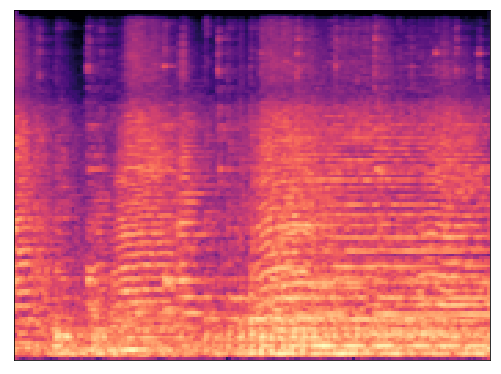

In [ ]:
path_to_sample_spectogram = "/content/drive/MyDrive/Introduction to Deep Learning/4- Final_Project/UrbanSound8K/spectograms/9/203654-9-0-60.png"
spectogram = cv.imread(path_to_sample_spectogram, cv.IMREAD_COLOR)
cv2_imshow(spectogram)
cv.waitKey(0)
cv.destroyAllWindows()

In [ ]:
#printing spectogram and its type
print(type(spectogram))
print(spectogram)

<class 'numpy.ndarray'>
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


In [ ]:
#spectogram's shape
spectogram.shape

(374, 501, 3)

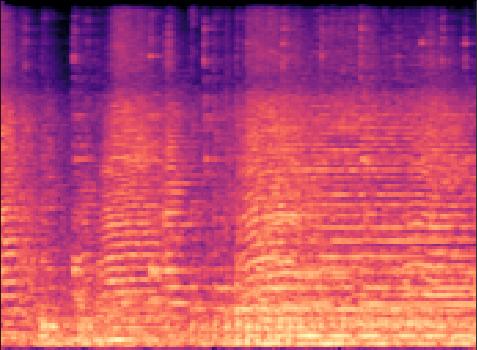

In [ ]:
#cutting spectogram's white border which have not any valuable information
cropped_spectogram = spectogram[10:360,14:491]
cv2_imshow(cropped_spectogram)
cv.waitKey(0)
cv.destroyAllWindows()

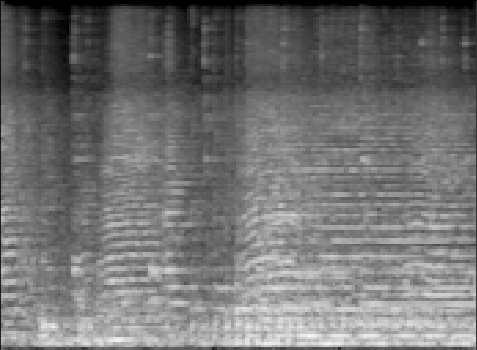

In [ ]:
spectogram_gray_scale = cv.cvtColor(cropped_spectogram,cv.COLOR_BGR2GRAY)
cv2_imshow(spectogram_gray_scale)
cv.waitKey(0)
cv.destroyAllWindows()

In [ ]:
#resizing sample spectogram
resized_spectogram = cv.resize(spectogram_gray_scale, (128,128))
resized_spectogram

array([[ 56,   0,   0, ...,   0,   0,  12],
       [ 64,  20,  16, ...,   0,   0,  13],
       [ 74,  60,  51, ...,  14,   2,  16],
       ...,
       [170, 149, 154, ..., 224, 200, 184],
       [120, 125, 126, ..., 190, 176, 160],
       [109,  80,  66, ...,  89,  98, 121]], dtype=uint8)

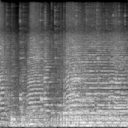

In [ ]:
cv2_imshow(resized_spectogram)
cv.waitKey(0)
cv.destroyAllWindows()

In [ ]:
print(type(resized_spectogram))
print(resized_spectogram.shape)

<class 'numpy.ndarray'>
(128, 128)


In [ ]:
#MinMax scaling of sample spectogram
scaled_spectogram =  minmax_scale(resized_spectogram)
scaled_spectogram

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.05970149, 0.10526316, 0.08290155, ..., 0.        , 0.        ,
        0.00478469],
       [0.13432836, 0.31578947, 0.2642487 , ..., 0.0625    , 0.00938967,
        0.01913876],
       ...,
       [0.85074627, 0.78421053, 0.79792746, ..., 1.        , 0.93896714,
        0.82296651],
       [0.47761194, 0.65789474, 0.65284974, ..., 0.84821429, 0.82629108,
        0.70813397],
       [0.39552239, 0.42105263, 0.34196891, ..., 0.39732143, 0.4600939 ,
        0.5215311 ]])

## Preprocessing of all spectograms
Let's preprocess all spectograms as we did on sample spectogram before

In [ ]:
images = []
error = 0
number = 0
error_file_link = f"{spectogram_filepath}/Error"
errors_file = open(f"{error_file_link}/errors.txt", "w+")

In [ ]:
for folder in os.listdir(spectogram_filepath):
  if folder == error_file_link:
    break
  else:
    category = folder
    for spectogram in  os.listdir(f"{spectogram_filepath}/{folder}"):
      spectogram = f"{spectogram_filepath}/{folder}/{spectogram}"
      try:
        spectogram = cv.imread(spectogram, cv.IMREAD_COLOR)
        cropped_spectogram = spectogram[10:360,14:491]
        spectogram_gray_scale = cv.cvtColor(cropped_spectogram,cv.COLOR_BGR2GRAY)
        resized_spectogram = cv.resize(spectogram_gray_scale, (128,128))
        scaled_spectogram =  minmax_scale(resized_spectogram)
        images.append([scaled_spectogram,int(category)])
      except Exception as e:
        error+=1
        errors_file.write(f"{error}) {e} \n")
      finally:
        number+=1
        print(f"\rProcessed: {number} | Errors: {error}", end="")
errors_file.close()

Processed: 8733 | Errors: 1

In [ ]:
print(images[0][0].shape)
print(np.array(images)[:,1])

(128, 128)
[0 0 0 ... 9 9 9]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


In [ ]:
for _ in range(10):
  random.shuffle(images)

In [ ]:
X = []
y = []

for image, idx in images:
  X.append(image)
  y.append(idx)

In [ ]:
X_train = []
y_train = []

X_val = []
y_val = []

X_test = []
y_test = []

In [ ]:
#creating training, val and test datasets in 80%/10%/10% proportion
X_train = X[:6986]
y_train = y[:6986]

X_val = X[6986:7859]
y_val = y[6986:7859]

X_test = X[7859:]
y_test = y[7859:]

In [ ]:
X_train = np.array(X_train)
y_train = np.array(y_train)

X_val = np.array(X_val)
y_val = np.array(y_val)

X_test = np.array(X_test)
y_test = np.array(y_test)

In [ ]:
print(len(X_train))
print(len(y_train))
print(len(X_val))
print(len(y_val))
print(len(X_test))
print(len(y_test))

6986
6986
873
873
873
873


In [ ]:
print(X_train[0].shape)
print(X_val[0].shape)
print(X_test[0].shape)

(128, 128)
(128, 128)
(128, 128)


In [ ]:
#creating pickle files 
pickle_file_link = f"/content/drive/MyDrive/Introduction to Deep Learning/4- Final_Project/UrbanSound8K/Pickles"
isExist = os.path.exists(pickle_file_link)
if not isExist:
  os.makedirs(spectogramfolder)

with open(f"{pickle_file_link}/X_train.pickle", "wb") as f:
  pickle.dump(X_train, f)  

with open(f"{pickle_file_link}/y_train.pickle", "wb") as f:
  pickle.dump(y_train, f)

with open(f"{pickle_file_link}/X_val.pickle", "wb") as f:
  pickle.dump(X_val, f)  
with open(f"{pickle_file_link}/y_val.pickle", "wb") as f:
  pickle.dump(y_val, f)

with open(f"{pickle_file_link}/X_test.pickle", "wb") as f:
  pickle.dump(X_test, f)  
with open(f"{pickle_file_link}/y_test.pickle", "wb") as f:
  pickle.dump(y_test, f)